Шаг 1. Стандартизировать данные методом MinMaxScaler
Сначала загрузим датасет и посмотрим его структуру:

In [13]:
import pandas as pd

# Загружаем данные
df = pd.read_csv("Walmart_Sales_clean.csv")

# Смотрим информацию о датасете
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  

Стандартизация методом MinMaxScaler
Описание действий:
Мы выбираем указанные признаки и приводим их к диапазону [0,1] с помощью MinMaxScaler.
Это позволит корректно сравнивать значения разных признаков при последующем анализе (PCA и факторный анализ).

In [15]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Загрузка
df = pd.read_csv("Walmart_Sales_clean.csv")

# Признаки и класс
features = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
X = df[features].values
y = df['Holiday_Flag'].values

# Масштабирование
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Преобразуем в DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=features)
print(X_scaled)


      Weekly_Sales  Temperature  Fuel_Price       CPI  Unemployment
0         0.397291     0.434149    0.050100  0.840500      0.405118
1         0.396811     0.396967    0.038076  0.841941      0.405118
2         0.388501     0.410861    0.021042  0.842405      0.405118
3         0.332458     0.476419    0.044589  0.842707      0.405118
4         0.372661     0.475147    0.076653  0.843008      0.405118
...            ...          ...         ...       ...           ...
6430      0.139437     0.654990    0.764028  0.651876      0.460514
6431      0.145057     0.655088    0.758016  0.653427      0.458884
6432      0.145337     0.553131    0.765531  0.654977      0.458884
6433      0.140810     0.572701    0.750000  0.655013      0.458884
6434      0.152491     0.595988    0.706413  0.654796      0.458884

[6435 rows x 5 columns]


Шаг 3. Понижение размерности. PCA и Factor Analysis

In [16]:
from sklearn.decomposition import PCA, FactorAnalysis

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_scaled.shape[1])])
X_pca['Holiday_Flag'] = y

# Factor Analysis (2 фактора)
fa = FactorAnalysis(n_components=2)
X_fa = fa.fit_transform(X_scaled)
X_fa = pd.DataFrame(X_fa, columns=['Factor1', 'Factor2'])
X_fa['Holiday_Flag'] = y

print("Дисперсия PCA:", pca.explained_variance_ratio_)
print(X_pca.head())
print(X_fa.head())


Дисперсия PCA: [0.53862147 0.18255171 0.12298779 0.08377992 0.07205911]
        PC1       PC2       PC3       PC4       PC5  Holiday_Flag
0  0.411219 -0.395612 -0.090536  0.056701  0.174830             0
1  0.411047 -0.418196 -0.112646  0.037191  0.187070             1
2  0.415234 -0.429874 -0.098834  0.042307  0.173592             0
3  0.419705 -0.386989 -0.043527  0.033636  0.118821             0
4  0.414372 -0.357554 -0.060596  0.056474  0.149452             0
    Factor1   Factor2  Holiday_Flag
0  0.858812  1.222671             0
1  0.842049  1.416524             1
2  0.851722  1.347082             0
3  0.889503  1.004184             0
4  0.887407  1.008621             0


Шаг 4. Дисперсия PCA

In [17]:
explained_var = pca.explained_variance_ratio_
cumulative_var = explained_var.cumsum()

print("Доля дисперсии по компонентам:", explained_var)
print("Суммарная объяснённая дисперсия:", cumulative_var)


Доля дисперсии по компонентам: [0.53862147 0.18255171 0.12298779 0.08377992 0.07205911]
Суммарная объяснённая дисперсия: [0.53862147 0.72117318 0.84416097 0.92794089 1.        ]


Диаграмма рассеяния для PCA (PC1 vs PC2)

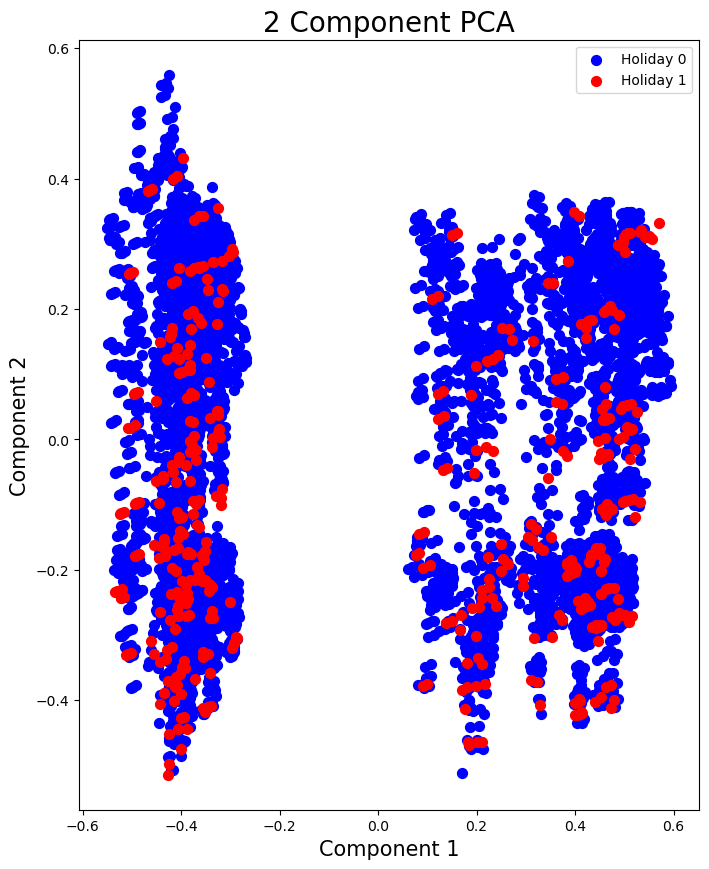

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Component 1', fontsize=15)
ax.set_ylabel('Component 2', fontsize=15)
ax.set_title('2 Component PCA', fontsize=20)

holiday = [0, 1]
colors = ['b', 'r']  # синий – обычная неделя, красный – праздничная

for h, color in zip(holiday, colors):
    indicesToKeep = X_pca['Holiday_Flag'] == h
    ax.scatter(
        X_pca.loc[indicesToKeep, 'PC1'],
        X_pca.loc[indicesToKeep, 'PC2'],
        c=color, s=50, label=f'Holiday {h}'
    )

ax.legend()
plt.show()


Диаграмма рассеяния для Factor Analysis (Factor1 vs Factor2)

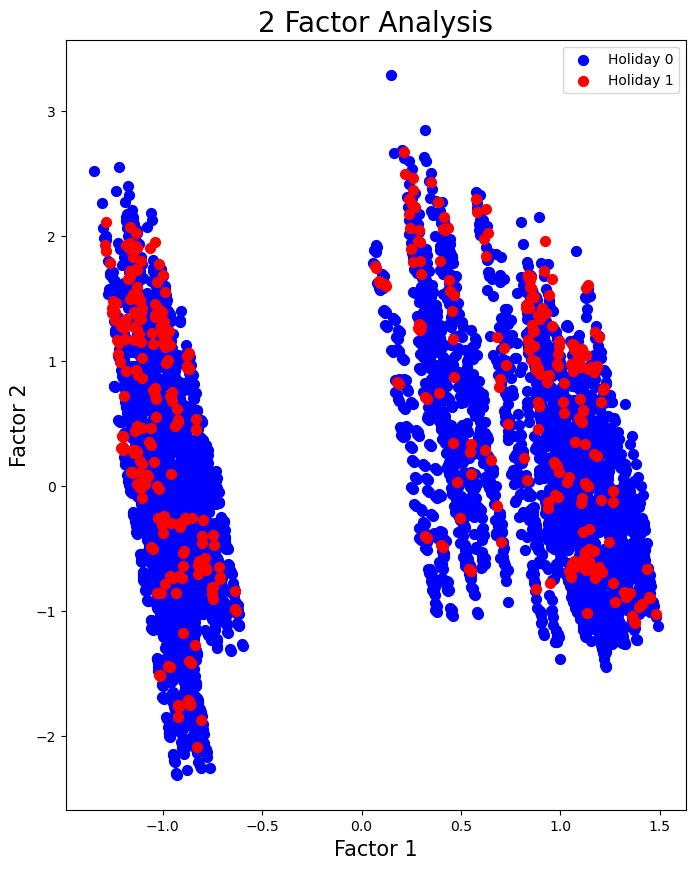

In [19]:
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Factor 1', fontsize=15)
ax.set_ylabel('Factor 2', fontsize=15)
ax.set_title('2 Factor Analysis', fontsize=20)

for h, color in zip(holiday, colors):
    indicesToKeep = X_fa['Holiday_Flag'] == h
    ax.scatter(
        X_fa.loc[indicesToKeep, 'Factor1'],
        X_fa.loc[indicesToKeep, 'Factor2'],
        c=color, s=50, label=f'Holiday {h}'
    )

ax.legend()
plt.show()
